In [1]:
import numpy as np
from collections import Counter


from sklearn import  model_selection, metrics, datasets
from pandas import DataFrame
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


import pandas as pd
import seaborn as sns
import math

In [2]:
def dist (a,b):
    return math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

class knn:
    def __init__(self, weights='distance',k = 5):
        self.weights = weights
        self.k = k

    def fit(self, train_data, train_labels):
        self.train_data = train_data
        self.train_labels = train_labels

    def predict(self, test_data):
        q = []
        for j in range(len(test_data)):
            w = []
            qq = []
            for i in range(len(self.train_data)):
                w.append([dist(test_data[j], self.train_data[i]), i])
            w = sorted(w)

            for i in range(self.k):
                index = w[i][1]
                qq.append((self.train_labels[index]))
            q.append((Counter(qq).most_common()[0][0]))
        return q

In [3]:
iris = datasets.load_iris()

In [4]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(iris.data, iris.target, 
                                                                                     test_size = 0.25)

In [5]:
test = knn( weights='distance')
test.fit(train_data,train_labels)
test_pred=test.predict(test_data)
metrics.accuracy_score(test_labels,test_pred)

0.7368421052631579

Text(0, 0.5, 'accuracy')

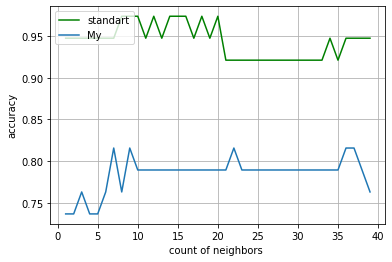

In [8]:
from matplotlib import pylab
neigh = np.arange(1,40,1)

KNeighborsClassifier_scores = []
knn_scores = [] # майн

for i in neigh:
    
    clf = KNeighborsClassifier(n_neighbors=i).fit(train_data,train_labels) 
    test = knn(k = i)
    test.fit(train_data,train_labels)
    KNeighborsClassifier_scores.append(metrics.accuracy_score(test_labels, clf.predict(test_data)))
    knn_scores.append(metrics.accuracy_score(test_labels, test.predict(test_data)))

pylab.grid(True)
pylab.plot(neigh, KNeighborsClassifier_scores, color = 'green', label='standart')
pylab.plot(neigh, knn_scores, label='My ') 
pylab.legend(loc='upper left')
pylab.xlabel('count of neighbors ')
pylab.ylabel('accuracy')